># **Work Flow of this notebook:**
         
          1.EDA on Numerical Features
           - Data Cleaning
           - Feature Generation
           - Skewing
           - Scaling
          2.EDA on Categorical Features
           - Data Cleaning 
          3.Regularization and Evaluation
           - Ridge
           - Lasso
           - Random Forest Regressor
           - XGB Regressor          

<span style="color:Green">If you find this notebook useful, Please Upvote it, It motivates me to write and share more quality content

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn import preprocessing


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [4]:
train_n=train[[c for c in train.columns if train[c].dtypes!='O']].copy()
test_n=test[[c for c in test.columns if test[c].dtypes!='O']].copy()

train_c=train[[c for c in train.columns if train[c].dtypes=='O']].copy()
test_c=test[[c for c in test.columns if test[c].dtypes=='O']].copy()

# 1. **EDA on Numerical Features**


**1.1 Removing non-linear and co-linear features**

In [5]:
corrmat=train_n.corr()
# fig,ax=plt.subplots(figsize=(12,12))
# sns.heatmap(corrmat,vmax=.8, square=True,ax=ax,annot=True, fmt='.2f', annot_kws={'size': 6})

In [6]:
n=15
top15_cols=corrmat.nlargest(n,'SalePrice')['SalePrice'].index

<AxesSubplot: >

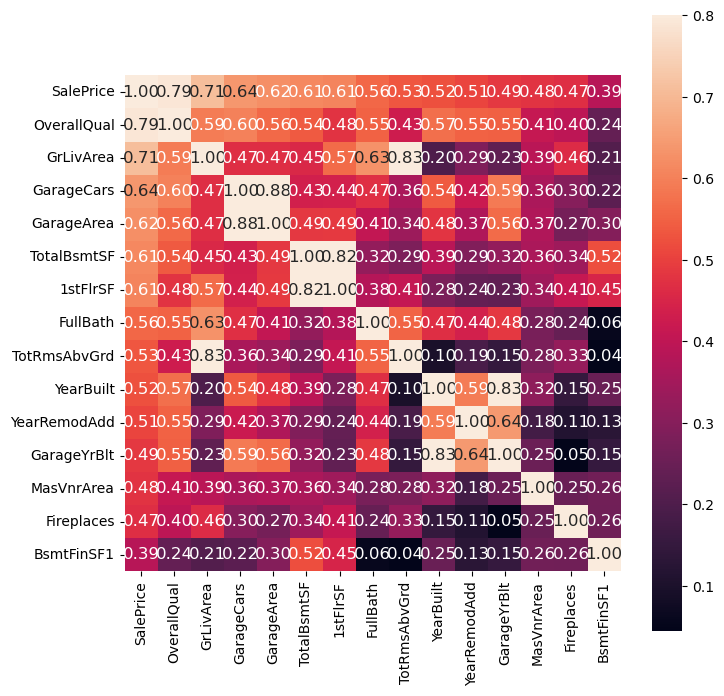

In [7]:
corrmat_top15=train_n[top15_cols].corr()
fig1,ax1=plt.subplots(figsize=(8,8))
sns.heatmap(corrmat_top15,vmax=.8, square=True,ax=ax1,annot=True, fmt='.2f', annot_kws={'size': 12})

**Co-linearity**:

We will choose only one feature from each co-linear pair.

* GarageCars and GarageArea 
* TotalBsmtSF and 1stFirSF 
* TotRmsAbvGrd and GrLIveArea 

>I choose GarageArea,TotalBsmtSF,GrLIveArea.I have made this decision by plotting below scatter plots.

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

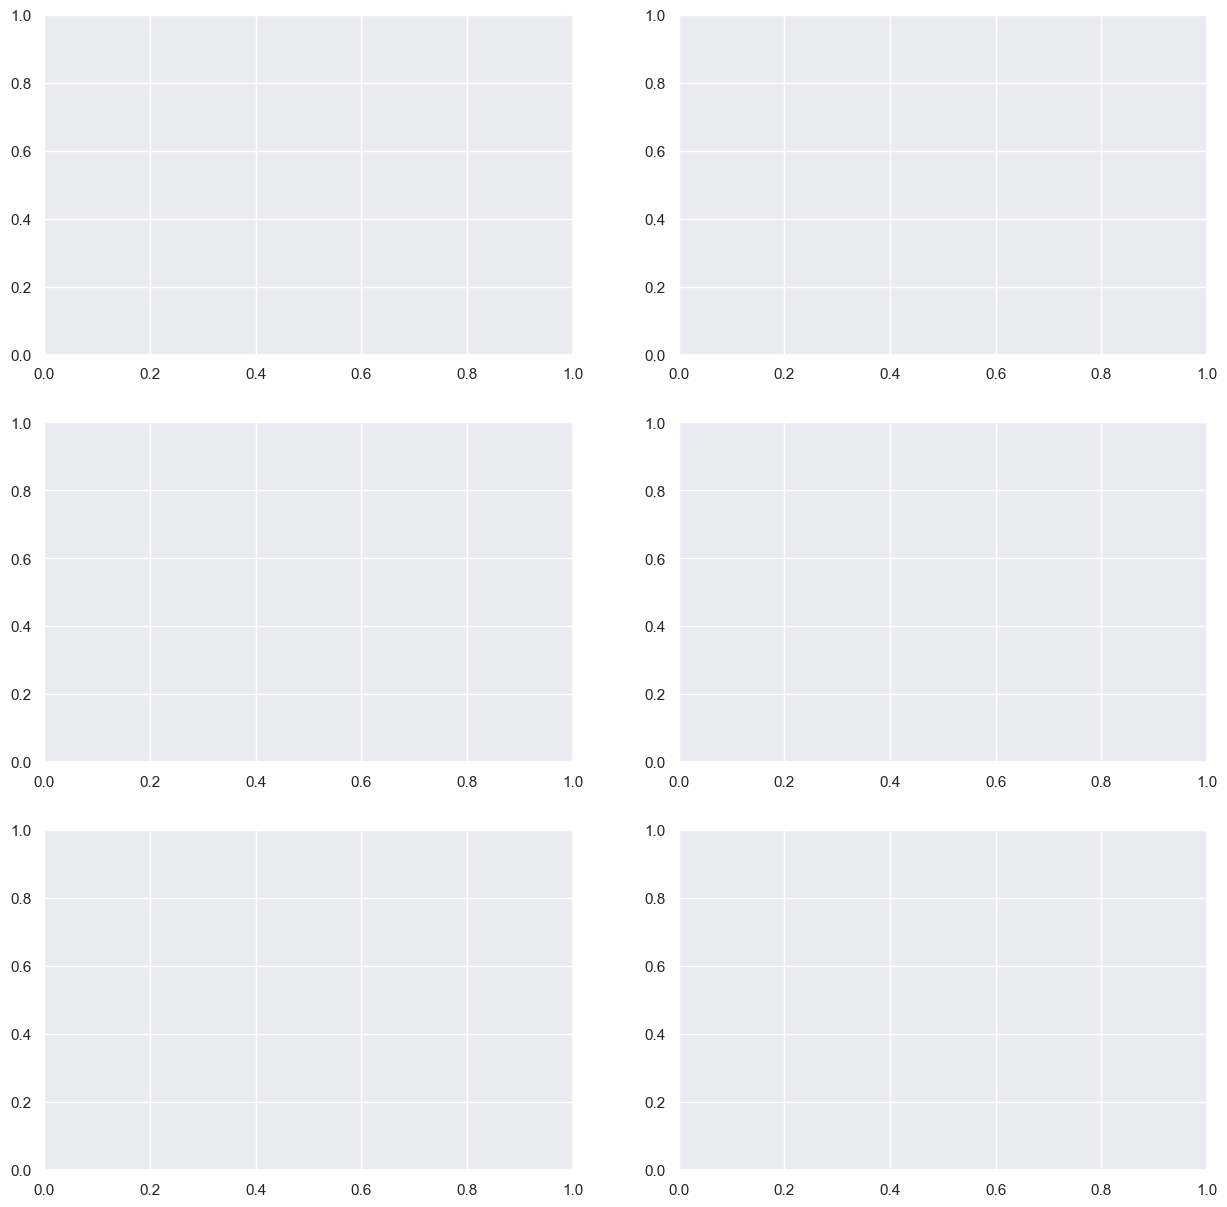

In [8]:
sns.set(style="darkgrid")

fig,ax=plt.subplots(3,2,figsize=(15,15))
sns.scatterplot(train_n['SalePrice'],train_n['GarageCars'],ax=ax[0][0],color='coral')
sns.scatterplot(train_n['SalePrice'],train_n['GarageArea'],ax=ax[0][1],color='coral')
sns.scatterplot(train_n['SalePrice'],train_n['TotalBsmtSF'],ax=ax[1][0],color='coral')
sns.scatterplot(train_n['SalePrice'],train_n['1stFlrSF'],ax=ax[1][1],color='coral')
sns.scatterplot(train_n['SalePrice'],train_n['TotRmsAbvGrd'],ax=ax[2][0],color='coral')
sns.scatterplot(train_n['SalePrice'],train_n['GrLivArea'],ax=ax[2][1],color='coral')
fig.tight_layout()

In [ ]:
# sns.jointplot(x=train['OverallQual'], y=train['SalePrice'], kind='reg',color='skyblue',height=7)

In [ ]:
train_n1=train_n.drop(['GarageCars','1stFlrSF','TotRmsAbvGrd'],axis=1)
test_n1=test_n.drop(['GarageCars','1stFlrSF','TotRmsAbvGrd'],axis=1)

We have removed co-linearity from our dataset, Now we will manually examine each feature and remove non-linear features from the dataset

In [ ]:
fig,ax=plt.subplots(17,2,figsize=(15,60))
def graph(x,y,r,c,title):
    sns.scatterplot(train_n1[x],y,color=('orange'),ax=ax[r][c])
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

for r,col in enumerate(train_n1.columns):
    c=r%2
    graph(col,train['SalePrice'],r//2,c,col)


<div>
Some features are like categorical features.
    <br><br>e.g.,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,KitchenAbrGr,MoSold,YrSold.
<br>
<br>
Although their type is Integer, We would treat them as a categorical feature in the next section [2.EDA on Categorical Features](#intLink)
</div>

In [ ]:
non_linear=['MSSubClass','LotArea','OverallCond','LowQualFinSF','BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath','BedroomAbvGr',
            'KitchenAbvGr','Fireplaces','3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal','MoSold', 'YrSold']
print("total non-linear",len(non_linear)," columns")

In [ ]:
linear_features=np.array([col for col in train_n1.columns if col not in non_linear])

We have removed some non-linear features from the dataset

**1.2 Misssing Values**

In [ ]:
# sns.set(style="whitegrid")
fig=plt.figure(figsize=(15,5))
train_null=train_n1.isnull().sum()[train_n1.isnull().sum()!=0]
sns.barplot(y=train_null.index,x=train_null)

In [ ]:
# sns.set(style="whitegrid")
fig=plt.figure(figsize=(15,5))
test_null=test_n1.isnull().sum()[test_n1.isnull().sum()!=0]
sns.barplot(y=test_null.index,x=test_null)

In [ ]:
train_n1['GarageYrBlt']=train_n1['GarageYrBlt'].fillna(train_n1['GarageYrBlt'].median())
test_n1['GarageYrBlt']=test_n1['GarageYrBlt'].fillna(test_n1['GarageYrBlt'].median())

for col in train_n1.columns:
    train_n1[col] = train_n1[col].fillna(0)
for col in test_n1.columns:
    test_n1[col] = test_n1[col].fillna(0)

In [ ]:
print(train_n1[linear_features].shape)
print(test_n1[linear_features[:-1]].shape)

In [ ]:
train_n1.isnull().sum()[train_n1.isnull().sum()!=0]

In [ ]:
test_n1.isnull().sum()[test_n1.isnull().sum()!=0]

**1.3 Feature Generation**

In [ ]:
# fig,ax=plt.subplots(9,2,figsize=(15,40))
# def graph(x,y,r,c,title):
#     sns.scatterplot(train_n1[x],train_n1[y],color=('red'),ax=ax[r][c])
#     ax[r][c].set_ylabel(y)
#     ax[r][c].set_xlabel(x)
#     fig.tight_layout(pad=5.0)

# for r,col in enumerate(train_n1[linear_features].columns):
#     c=r%2
#     graph(col,'SalePrice',r//2,c,col)

>* We can clearly see in the above graphs that features have so many zeros.
>* That means many missing values are filled with zero.

In [ ]:
train_n1['Bsmt']=train_n1['BsmtFinSF1']+train_n1['BsmtFinSF2']+train_n1['BsmtUnfSF']+train_n1['TotalBsmtSF']
test_n1['Bsmt']=test_n1['BsmtFinSF1']+test_n1['BsmtFinSF2']+test_n1['BsmtUnfSF']+test_n1['TotalBsmtSF']
sns.jointplot(train_n1['Bsmt'],train_n1['SalePrice'],kind='hex',color='purple')
# sns.jointplot(train_n1['BsmtFinSF1'],train_n1['SalePrice'],kind='reg',color='green')

In [ ]:
train_n1['TotalPorchSF']=train_n1['EnclosedPorch']+train_n1['OpenPorchSF']
test_n1['TotalPorchSF']=test_n1['EnclosedPorch']+test_n1['OpenPorchSF']

sns.jointplot(train_n1['TotalPorchSF'],train_n1['SalePrice'],kind='hex',color='purple')

But this new TotalPorchSF feature is not linear with SalePrice so we will not use it .

In [ ]:
linear_features

In [ ]:
linear_features=['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea','Bsmt', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

In [ ]:
train_n1[linear_features].columns

In [ ]:
train_n1[linear_features].shape

In [ ]:
test_n1[linear_features].shape

**1.4 Outliers**

>Outliers:

     LotFrontage > 300 
     MasVnrArea > 1200
     Bsmt > 12000
     GrLivArea > 4600
     GarageArea > 1200
     SalePrice > 700000

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
def graph(x,y,r,c,title,line):
    sns.scatterplot(train_n1[x],train_n1[y],color=('orange'),ax=ax[r][c])
    sns.lineplot(x=line,y=train_n1[y],color='red',ax=ax[r][c])
    ax[r][c].set_ylabel(y)
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

out=[300,1200,12000,4600,1200]
for r,col in enumerate(np.array(['LotFrontage','MasVnrArea','Bsmt','GrLivArea','GarageArea'])):
    c=r%2
    graph(col,'SalePrice',r//2,c,col,out[r])

In [ ]:
a=train_n1['LotFrontage'].sort_values(ascending=False).head(2)
b=train_n1['MasVnrArea'].sort_values(ascending=False).head(2)
c=train_n1['Bsmt'].sort_values(ascending=False).head(1)
d=train_n1['GrLivArea'].sort_values(ascending=False).head(2)
e=train_n1['GarageArea'].sort_values(ascending=False).head(3)
f=train_n1['SalePrice'].sort_values(ascending=False).head(2)

In [ ]:
index=a.index
index=index.append(b.index)
index=index.append(c.index)
index=index.append(d.index)
index=index.append(e.index)
index=index.append(f.index)

In [ ]:
train_n1=train_n1.drop(index).reset_index(drop=True)

>we have removed the outliears manually

In [ ]:
# fig,ax=plt.subplots(7,2,figsize=(15,30))
# def graph(x,y,r,c,title):
#     sns.regplot(train_n1[x],train_n1[y],color=('green'),ax=ax[r][c])
#     ax[r][c].set_ylabel(y)
#     ax[r][c].set_xlabel(x)
#     fig.tight_layout(pad=5.0)

# for r,col in enumerate(train_n1[linear_features].columns):
#     c=r%2
#     graph(col,'SalePrice',r//2,c,col)

In [ ]:
print(train_n1.shape)
print(train_n1[linear_features].shape)

**1.5 Skewing the features**

In [ ]:
Train_X_n=train_n1[linear_features]
Train_Y_n=train_n1['SalePrice']

In [ ]:
Train_X_n.skew()

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(Train_Y_n,ax=ax[0],color='green')
sns.distplot(np.log1p(Train_Y_n),ax=ax[1],color='green')
# fig.tight_layout()

In [ ]:
y_train=np.log1p(Train_Y_n)

**1.6 scaling**

In [ ]:
# scaler=StandardScaler()
scaler=RobustScaler()
final_train_n=pd.DataFrame(scaler.fit_transform(Train_X_n),columns=Train_X_n.columns)
final_test_n=pd.DataFrame(scaler.fit_transform(test_n1[linear_features]),columns=Train_X_n.columns)

In [ ]:
final_train_n.head()

In [ ]:
final_test_n.head()

# 2. **EDA on Categorical Features**

**2.1 Missing values **

In [ ]:
train_c=train[[c for c in train.columns if train[c].dtypes=='O']].copy()
test_c=test[[c for c in test.columns if test[c].dtypes=='O']].copy()

In [ ]:
# print(train_c.shape)
fig=plt.figure(figsize=(10,5))
train_null=train_c.isnull().sum()[train_c.isnull().sum()!=0].sort_values(ascending=False)
sns.barplot(y=train_null.index,x=train_null)

In [ ]:
fig=plt.figure(figsize=(10,5))
test_null=test_c.isnull().sum()[test_c.isnull().sum()!=0].sort_values(ascending=False)
sns.barplot(y=test_null.index,x=test_null)

Drop first five columns 

In [ ]:
train_c.dropna(thresh=len(train_c)*0.9,axis=1,inplace=True)

In [ ]:
test_c.dropna(thresh=len(test_c)*0.9,axis=1,inplace=True)

In [ ]:
train_c['Electrical']=train_c['Electrical'].fillna(method='ffill')
test_c['SaleType']=test_c['SaleType'].fillna(method='ffill')
test_c['KitchenQual']=test_c['KitchenQual'].fillna(method='ffill')
test_c['Exterior1st']=test_c['Exterior1st'].fillna(method='ffill')
test_c['Exterior2nd']=test_c['Exterior2nd'].fillna(method='ffill')
test_c['Functional']=test_c['Functional'].fillna(method='ffill')
test_c['Utilities']=test_c['Utilities'].fillna(method='ffill')
test_c['MSZoning']=test_c['MSZoning'].fillna(method='ffill')


In [ ]:
# Categorical missing values
for col in train_c.columns:
    train_c[col] = train_c[col].fillna("None")
for col in test_c.columns:
    test_c[col] = test_c[col].fillna("None")

In [ ]:
print("Train null values : ",len(train_c.isnull().sum()[train_c.isnull().sum()!=0]))
print("Test null values : ",len(test_c.isnull().sum()[test_c.isnull().sum()!=0]))

In [ ]:
train_c=train_c.drop(index).reset_index(drop=True)
train_c.shape

In [ ]:
test_c.shape

<div id="intLink">
**2.2 Feature engineering**
    </div>

We had discussed about some numerical features which looked like categorical features. Now we will work on it in this section

In [ ]:
num_train=train_n1[['OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr',
'BedroomAbvGr','Fireplaces','MoSold','YrSold']]
num_test=test_n1[['OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr',
'BedroomAbvGr','Fireplaces','MoSold','YrSold']]
print(num_train.shape)
print(num_test.shape)
numerical_categorical_feature=c = pd.concat((num_train,num_test),sort=False)
print(numerical_categorical_feature.shape)
numerical_categorical_feature=numerical_categorical_feature.astype('O')

In [ ]:
sns.violinplot(x=num_train['OverallCond'],y=num_train['OverallCond'].index)

In [ ]:
numerical_categorical_feature=pd.get_dummies(numerical_categorical_feature)
num_train_dummy=numerical_categorical_feature[:1451]
num_test_dummy=numerical_categorical_feature[1451:].reset_index(drop=True)
print(num_train_dummy.shape)
print(num_test_dummy.shape)

**2.3 Get Dummies**

In [ ]:
c = pd.concat((train_c, test_c), sort=False).reset_index(drop=True)

In [ ]:
c1=pd.get_dummies(c)

In [ ]:
final_train_c=c1.iloc[:train_c.shape[0]]
# final_train_c=final_train_c.drop(index).reset_index(drop=True)
final_train_c.shape

In [ ]:
final_test_c=c1.iloc[train_c.shape[0]:]
final_test_c=final_test_c.reset_index(drop=True)
final_test_c.shape

**2.4 merge the numerical_categorical_feature with final_test_c**

In [ ]:
final_train_c=final_train_c.merge(num_train_dummy,left_index=True,right_index=True)
final_test_c=final_test_c.merge(num_test_dummy,left_index=True,right_index=True)

**2.5 Labeling only for XGB Regressor**

In [ ]:
train_c_labeled=pd.DataFrame()
test_c_labeled=pd.DataFrame()

for col in train_c.columns:
    le = preprocessing.LabelEncoder()
    train_c_labeled[col]=le.fit_transform(train_c[col])
    test_c_labeled[col]=le.fit_transform(test_c[col])

In [ ]:
test_c_labeled

In [ ]:
final_test_n

# 3. Merging numerical and categorical data

In [ ]:
x_train=final_train_n.merge(final_train_c,left_index=True,right_index=True).reset_index(drop=True)
x_test=final_test_n.merge(final_test_c,left_index=True,right_index=True).reset_index(drop=True)

**Merging for XGB Regressor**

In [ ]:
x_train_xgb=final_train_n.merge(train_c_labeled,left_index=True,right_index=True).reset_index(drop=True)
x_test_xgb=final_test_n.merge(test_c_labeled,left_index=True,right_index=True).reset_index(drop=True)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_train_xgb.shape)
print(x_test_xgb.shape)

# 4. Splitting data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train,test_size = .3, random_state=0)

# 5. **Regularization and Evaluation**

**5.1 Ridge**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge=Ridge()
parameters= {'alpha':[x for x in [0.1,0.2,0.4,0.5,0.7,0.8,1]]}

ridge_reg=GridSearchCV(ridge, param_grid=parameters)
ridge_reg.fit(X_train,Y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)

In [ ]:
ridge_mod=Ridge(alpha=1)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(X_train)
y_pred_test=ridge_mod.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_test, y_pred_test)))) 

**5.2 Lasso**

In [ ]:
from sklearn.linear_model import Lasso

Lasso_reg =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,1]]}

Lasso_reg=GridSearchCV(Lasso_reg, param_grid=parameters)
Lasso_reg.fit(X_train,Y_train)
print("The best value of Alpha is: ",Lasso_reg.best_params_,Lasso_reg.best_score_)

In [ ]:
Lasso_reg =Lasso(alpha=0.0005)
Lasso_reg.fit(x_train,y_train)
y_pred_train=Lasso_reg.predict(X_train)
y_pred_test=Lasso_reg.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_test, y_pred_test)))) 

**5.3 Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
params = {"max_depth":[15,20,25], "n_estimators":[27,30,33]}
rf_reg = GridSearchCV(rf, params, cv = 10, n_jobs =10)
rf_reg.fit(X_train, Y_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_test, y_pred_test)))) 

**5.4 XGB Regressor**

In [ ]:
X_train_xgb, X_test_xgb, Y_train_xgb, Y_test_xgb = train_test_split(x_train_xgb,y_train,test_size = 0.3, random_state=0)

In [ ]:
import xgboost as xgb

xgbr = xgb.XGBRegressor()
params = {'learning_rate': [0.10,0.14,0.15,0.16, 0.2], 'max_depth': [1,2,3,5] }

xgbr_reg = GridSearchCV(xgbr, params, cv = 10, n_jobs =1)
xgbr_reg.fit(X_train_xgb,Y_train_xgb)

print("Best params:{}".format(xgbr_reg.best_params_))

best_x = xgbr_reg.best_estimator_
y_train_pred_x = best_x.predict(X_train_xgb)
y_val_pred_x = best_x.predict(X_test_xgb)

In [ ]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train_xgb, y_train_pred_x))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_test_xgb, y_val_pred_x)))) 

**5.3 Prediction**

Ridge performs better than the Lasso on this dataset

In [ ]:
y_test=ridge_mod.predict(x_test)

In [ ]:
final_y_test=np.expm1(y_test)

In [ ]:
final_y_test

In [ ]:
sample=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission=pd.DataFrame({"Id":sample['Id'],
                         "SalePrice":final_y_test})
submission.to_csv('submission.csv',index=False)

In [ ]:
submission.head()